In [1]:
pip install folium


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import gpxpy.geo as geo
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier 
import xgboost as xgb
from sklearn.metrics import roc_curve, auc,confusion_matrix,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import pairwise_distances
import folium
from sklearn.utils import resample

In [3]:
import pandas as pd

import math
import multiprocess as mp
import numpy as np
import pickle

In [4]:
nbrs = pd.read_csv('D:/neighbor_Planing/nbrs.csv')
nw = pd.read_csv('D:/neighbor_Planing/nw.csv', encoding='unicode_escape')

In [5]:
nw['latitude']=nw['latitude'].str.extract('(\d+)', expand=False)
nw['longitude']=nw['longitude'].str.extract('(\d+)', expand=False)

In [6]:
nbrs.head()

,sourcesite,sourcecell,targetsite,targetcell
0,2505,1,2505,1
1,2505,1,2505,2
2,2505,1,2505,3
3,2505,1,2205,2
4,2505,1,2511,2


In [7]:
nbrs.dtypes

sourcesite    int64
sourcecell    int64
targetsite    int64
targetcell    int64
dtype: object

In [8]:
nw.dtypes

site          int64
cell          int64
latitude     object
longitude    object
azimuth       int64
dtype: object

In [9]:
nbrs.columns=[x.lower() for x in list(nbrs.columns)]
nbrs.drop_duplicates(inplace=True)
nbrs.dropna(inplace=True)
nw.columns=[x.lower() for x in list(nw.columns)]
nw=nw[['site','cell','latitude','longitude','azimuth']]
nw.drop_duplicates(inplace=True)
nw.dropna(inplace=True)

In [10]:
src_info_added=nbrs.merge(nw,how='inner',left_on=['sourcesite','sourcecell'],right_on=['site','cell'])
tgt_info_added=src_info_added.merge(nw,how='inner',left_on=['targetsite','targetcell'],right_on=['site','cell'])



In [11]:
tgt_info_added['latitude_x']=tgt_info_added['latitude_x'].astype(int)
tgt_info_added['latitude_y']=tgt_info_added['latitude_y'].astype(int)
tgt_info_added['longitude_x']=tgt_info_added['longitude_x'].astype(int)
tgt_info_added['longitude_y']=tgt_info_added['longitude_y'].astype(int)

In [12]:
tgt_info_added.dtypes

sourcesite     int64
sourcecell     int64
targetsite     int64
targetcell     int64
site_x         int64
cell_x         int64
latitude_x     int32
longitude_x    int32
azimuth_x      int64
site_y         int64
cell_y         int64
latitude_y     int32
longitude_y    int32
azimuth_y      int64
dtype: object

In [13]:
tgt_info_added['distance']= tgt_info_added.apply(lambda row:
                                           geo.haversine_distance(row['latitude_x'],row['longitude_x'],row['latitude_y'],row['longitude_y']),axis=1)

In [14]:
tgt_info_added.to_csv('d.csv')

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

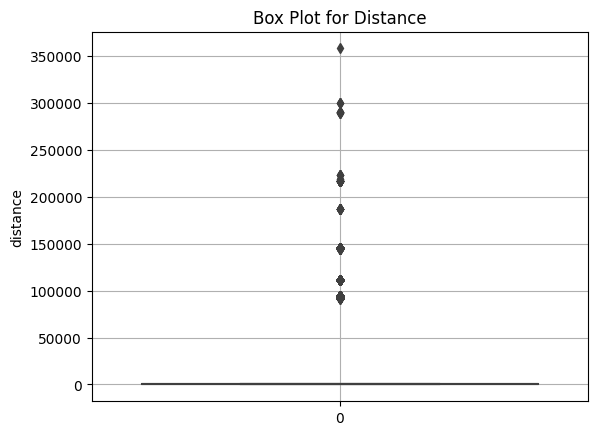

In [16]:
sns.boxplot(data =tgt_info_added['distance'])
plt.title("Box Plot for Distance")
plt.ylabel('distance')
plt.grid()
plt.show()

In [17]:
nbrs_filtered=tgt_info_added[tgt_info_added['distance']<=3000]
nbrs_filtered.drop(['site_x','cell_x','site_y','cell_y'],axis=1,inplace=True)
nbrs_filtered['y']=1

In [18]:
known_nw=pd.merge(nw,nbrs_filtered,how="inner",left_on=["site","cell"],right_on=["sourcesite","sourcecell"])

In [19]:
known_nw=known_nw[list(known_nw.columns[:5])]
known_nw.drop_duplicates(inplace=True)
known_nw.shape

(9640, 5)

In [ ]:
nbr_space=known_nw.merge(known_nw,how='cross')
nbr_space['distance']=nbr_space.apply(lambda row:
                                        geo.haversine_distance(row['latitude_x'],row['longitude_x'],row['latitude_y'],row['longitude_y']),axis=1)


In [1]:
nbr_space=nbr_space[(nbr_space['distance']>=0) & (nbr_space['distance']<3000) ]

NameError: name 'nbr_space' is not defined